# 1.Import Dependencies

In [34]:
import pandas as pd
import numpy as np
import json
import requests
import warnings
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# 2. Load Data from profiles.JSONL

In [38]:
profiles_df = pd.read_json("profiles.JSONL", lines=True)
profiles_df.head()

,Customer_ID,age,location,salary,race,gender,education
0,CUST3286,32,South,75000,White,Male,Bachelor's
1,CUST4582,28,North,68000,Asian,Female,Master's
2,CUST8359,45,West,92000,Hispanic,Male,PhD
3,CUST7924,39,South,81000,Black,Male,Bachelor's
4,CUST2519,26,East,58000,White,Female,High School


# 3. Load Data from sales_data.CSV

In [40]:
sales_df = pd.read_csv("sales_data.CSV")
sales_df.head()

,Sale_ID,Date,Product,Quantity,Unit_Price,Total_Price,Region,Sales_Rep,Customer_ID
0,1,2024-11-23,Smartphone,1,1117.49,1117.49,South,Bob,CUST3286
1,2,2024-02-22,Smartphone,10,644.44,6444.40,North,Alice,CUST4582
2,3,2024-04-29,Laptop,9,314.28,2828.52,West,Bob,CUST8359
3,4,2024-10-28,Keyboard,1,1143.03,1143.03,South,Frank,CUST7924
4,5,2024-06-23,Keyboard,3,338.66,1015.98,East,Alice,CUST2519


# 4. Fetch ing Product Data from API

In [ ]:
# fetch('https://dummyjson.com/products')
# .then(res => res.json())
# .then(console.log);


url = 'https://dummyjson.com/products'
response = requests.get(url)

if response.status_code==200:
    data = response.json()['products']
    data = pd.json_normalize(data)
    # print(data)
else:
    print("zavutapo")


# products_df = pd.read_csv('products.csv')

In [44]:
data.head()

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,sku,weight,warrantyInformation,shippingInformation,availabilityStatus,reviews,returnPolicy,minimumOrderQuantity,images,thumbnail,dimensions.width,dimensions.height,dimensions.depth,meta.createdAt,meta.updatedAt,meta.barcode,meta.qrCode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,"[beauty, mascara]",Essence,BEA-ESS-ESS-001,4,1 week warranty,Ships in 3-5 business days,In Stock,"[{'rating': 3, 'comment': 'Would not recommend...",No return policy,48,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,15.14,13.08,22.99,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,5784719087687,https://cdn.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,"[beauty, eyeshadow]",Glamour Beauty,BEA-GLA-EYE-002,9,1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",7 days return policy,20,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,9.26,22.47,27.67,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9170275171413,https://cdn.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,"[beauty, face powder]",Velvet Touch,BEA-VEL-POW-003,8,3 months warranty,Ships in 1-2 business days,In Stock,"[{'rating': 4, 'comment': 'Would buy again!', ...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,29.27,27.93,20.59,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,8418883906837,https://cdn.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,"[beauty, lipstick]",Chic Cosmetics,BEA-CHI-LIP-004,1,3 year warranty,Ships in 1 week,In Stock,"[{'rating': 4, 'comment': 'Great product!', 'd...",7 days return policy,40,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,18.11,28.38,22.17,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9467746727219,https://cdn.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,"[beauty, nail polish]",Nail Couture,BEA-NAI-NAI-005,8,1 month warranty,Ships overnight,In Stock,"[{'rating': 2, 'comment': 'Poor quality!', 'da...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,21.63,16.48,29.84,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,4063010628104,https://cdn.dummyjson.com/public/qr-code.png


In [46]:
products_df = data

# 5. Data Transformation

# i. Clean and Transform profiles_df

In [48]:
# Removing duplicates and nulls
profiles_df = profiles_df.drop_duplicates().dropna()

# Standardizing column names
profiles_df.columns = profiles_df.columns.str.strip().str.lower()

print("Cleaned Profiles Data:")
profiles_df.head()

Cleaned Profiles Data:


,customer_id,age,location,salary,race,gender,education
0,CUST3286,32,South,75000,White,Male,Bachelor's
1,CUST4582,28,North,68000,Asian,Female,Master's
2,CUST8359,45,West,92000,Hispanic,Male,PhD
3,CUST7924,39,South,81000,Black,Male,Bachelor's
4,CUST2519,26,East,58000,White,Female,High School


# ii. Clean and Transform sales_df

In [50]:
# Removing duplicates and nulls
sales_df = sales_df.drop_duplicates().dropna()

# Standardizing column names
sales_df.columns = sales_df.columns.str.strip().str.lower()

# Formating date column
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')

# Formating currency columns
sales_df['unit_price'] = sales_df['unit_price'].astype(float).round(2)
sales_df['total_price'] = sales_df['total_price'].astype(float).round(2)

print("Cleaned Sales Data:")
sales_df.head()

Cleaned Sales Data:


,sale_id,date,product,quantity,unit_price,total_price,region,sales_rep,customer_id
0,1,2024-11-23,Smartphone,1,1117.49,1117.49,South,Bob,CUST3286
1,2,2024-02-22,Smartphone,10,644.44,6444.40,North,Alice,CUST4582
2,3,2024-04-29,Laptop,9,314.28,2828.52,West,Bob,CUST8359
3,4,2024-10-28,Keyboard,1,1143.03,1143.03,South,Frank,CUST7924
4,5,2024-06-23,Keyboard,3,338.66,1015.98,East,Alice,CUST2519


# iii. Clean and Transform products_df

In [52]:
# Step 1: Standardizing column names
products_df.columns = products_df.columns.str.strip().str.lower()

# Step 2: Dropping duplicates using only hashable columns
# Excluding known unhashable list/dict columns
unhashable_columns = ['tags', 'images', 'reviews']
hashable_columns = [col for col in products_df.columns if col not in unhashable_columns]

products_df = products_df.drop_duplicates(subset=hashable_columns)

# Step 3: Dropping rows with missing essential values (title, price)
products_df = products_df.dropna(subset=["title", "price"])

# Step 4: Formating currency
products_df['price'] = products_df['price'].astype(float).round(2)

# Step 5: Formating date fields if they exist
for date_col in ['meta.createdat', 'meta.updatedat']:
    if date_col in products_df.columns:
        products_df[date_col] = pd.to_datetime(products_df[date_col], errors='coerce')

print("Cleaned Product Data:")
products_df.head()


Cleaned Product Data:


,id,title,description,category,price,discountpercentage,rating,stock,tags,brand,sku,weight,warrantyinformation,shippinginformation,availabilitystatus,reviews,returnpolicy,minimumorderquantity,images,thumbnail,dimensions.width,dimensions.height,dimensions.depth,meta.createdat,meta.updatedat,meta.barcode,meta.qrcode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,"[beauty, mascara]",Essence,BEA-ESS-ESS-001,4,1 week warranty,Ships in 3-5 business days,In Stock,"[{'rating': 3, 'comment': 'Would not recommend...",No return policy,48,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,15.14,13.08,22.99,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,5784719087687,https://cdn.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,"[beauty, eyeshadow]",Glamour Beauty,BEA-GLA-EYE-002,9,1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",7 days return policy,20,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,9.26,22.47,27.67,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,9170275171413,https://cdn.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,"[beauty, face powder]",Velvet Touch,BEA-VEL-POW-003,8,3 months warranty,Ships in 1-2 business days,In Stock,"[{'rating': 4, 'comment': 'Would buy again!', ...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,29.27,27.93,20.59,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,8418883906837,https://cdn.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,"[beauty, lipstick]",Chic Cosmetics,BEA-CHI-LIP-004,1,3 year warranty,Ships in 1 week,In Stock,"[{'rating': 4, 'comment': 'Great product!', 'd...",7 days return policy,40,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,18.11,28.38,22.17,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,9467746727219,https://cdn.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,"[beauty, nail polish]",Nail Couture,BEA-NAI-NAI-005,8,1 month warranty,Ships overnight,In Stock,"[{'rating': 2, 'comment': 'Poor quality!', 'da...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,21.63,16.48,29.84,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,4063010628104,https://cdn.dummyjson.com/public/qr-code.png


# 6. Merge Profiles with Customer Sales Data

In [54]:
# Merging profiles and sales data on 'customer_id'
merged_df = pd.merge(profiles_df, sales_df, on='customer_id', how='inner')

merged_df.head()

,customer_id,age,location,salary,race,gender,education,sale_id,date,product,quantity,unit_price,total_price,region,sales_rep
0,CUST3286,32,South,75000,White,Male,Bachelor's,1,2024-11-23,Smartphone,1,1117.49,1117.49,South,Bob
1,CUST4582,28,North,68000,Asian,Female,Master's,2,2024-02-22,Smartphone,10,644.44,6444.40,North,Alice
2,CUST8359,45,West,92000,Hispanic,Male,PhD,3,2024-04-29,Laptop,9,314.28,2828.52,West,Bob
3,CUST7924,39,South,81000,Black,Male,Bachelor's,4,2024-10-28,Keyboard,1,1143.03,1143.03,South,Frank
4,CUST2519,26,East,58000,White,Female,High School,5,2024-06-23,Keyboard,3,338.66,1015.98,East,Alice


# 7. Save Cleaned Data

In [56]:
# Saving transformed data
profiles_df.to_csv("cleaned_profiles.csv", index=False)
sales_df.to_csv("cleaned_sales.csv", index=False)
products_df.to_csv("cleaned_products.csv", index=False)
merged_df.to_csv("merged_profiles_sales.csv", index=False)

# 8. Schema Design

### 🧮 Fact Table: fact_sales

| Column        | Type    | Description                                 |
| ------------- | ------- | ------------------------------------------- |
| `sale_id`     | `int`   | Unique identifier for each sale             |
| `customer_id` | `text`  | Foreign key to `dim_customer`               |
| `product`     | `text`  | Name of product sold                        |
| `quantity`    | `int`   | Quantity of product sold                    |
| `unit_price`  | `float` | Price per single item                       |
| `total_price` | `float` | Total sale amount (`quantity * unit_price`) |
| `date`        | `date`  | Foreign key to `dim_date`                   |
| `region`      | `text`  | Region of sale                              |
| `sales_rep`   | `text`  | Name of the sales representative            |


### 🧑 Dimension Table: dim_customer

| Column        | Type    | Description             |
| ------------- | ------- | ----------------------- |
| `customer_id` | `text`  | Primary key             |
| `age`         | `int`   | Age of the customer     |
| `location`    | `text`  | Region or location      |
| `salary`      | `float` | Annual income           |
| `race`        | `text`  | Race or ethnicity       |
| `gender`      | `text`  | Gender                  |
| `education`   | `text`  | Highest education level |


### 📅 Dimension Table: dim_date

| Column    | Type   | Example      |
| --------- | ------ | ------------ |
| `date`    | `date` | `2024-11-23` |
| `year`    | `int`  | `2024`       |
| `month`   | `int`  | `11`         |
| `day`     | `int`  | `23`         |
| `quarter` | `int`  | `4`          |
| `weekday` | `text` | `Saturday`   |


### 📦 Dimension Table: dim_product

| Column     | Type    | Description                |
| ---------- | ------- | -------------------------- |
| `title`    | `text`  | Product name (primary key) |
| `category` | `text`  | Product category           |
| `brand`    | `text`  | Brand name                 |
| `price`    | `float` | Price of product           |
| `stock`    | `int`   | Units in stock             |


# Installing Required Libraries

In [21]:
# !pip install sqlalchemy psycopg2-binary

# 9. Setting up Connection with SQLAlchemy

In [58]:
from sqlalchemy import create_engine
from sqlalchemy import text

In [60]:
user = 'postgres'
password = '21%2021%20basi' 
host = 'localhost'
port = '5432'
database = 'data_warehouse'

try:
    # Creation of sqlalchamy engine
    engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')
    print("Zayendatu apa mandem😎")
except Exception as e:
    print("bro we are cooked🤣")
    print(e)

Zayendatu apa mandem😎


# 10. Creating dim_date from sales_df

In [62]:
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')

# Extractin date components
dim_date_df = sales_df[['date']].drop_duplicates().dropna()
dim_date_df['year'] = dim_date_df['date'].dt.year
dim_date_df['month'] = dim_date_df['date'].dt.month
dim_date_df['day'] = dim_date_df['date'].dt.day
dim_date_df['quarter'] = dim_date_df['date'].dt.quarter
dim_date_df['weekday'] = dim_date_df['date'].dt.day_name()

# 11. Load Tables to PostgreSQL

In [64]:
profiles_df.to_sql('dim_customer', engine, if_exists='replace', index=False)
products_df[['title', 'category', 'brand', 'price', 'stock']].drop_duplicates().to_sql('dim_product', engine, if_exists='replace', index=False)
dim_date_df.to_sql('dim_date', engine, if_exists='replace', index=False)

# Fact Table
sales_fact_df = sales_df[['sale_id', 'customer_id', 'product', 'quantity', 'unit_price', 'total_price', 'date', 'region', 'sales_rep']]
sales_fact_df.to_sql('fact_sales', engine, if_exists='replace', index=False)


200

# 12. Confirming that Tables Exist

In [66]:
with engine.connect() as conn:
    result = conn.execute(text("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';"))
    for row in result:
        print(row)

('dim_customer',)
('dim_product',)
('dim_date',)
('fact_sales',)


# 13. Reporting

In [68]:
style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Total Sales by Region

In [70]:
query = text("""
    SELECT 
        region,
        ROUND(SUM(total_price)::NUMERIC, 2) AS total_sales
    FROM 
        fact_sales
    GROUP BY 
        region
    ORDER BY 
        total_sales DESC;
""")

region_sales_df = pd.read_sql(query, con=engine)
region_sales_df.head()

,region,total_sales
0,West,249077.05
1,North,207882.06
2,East,173709.81
3,South,153957.92


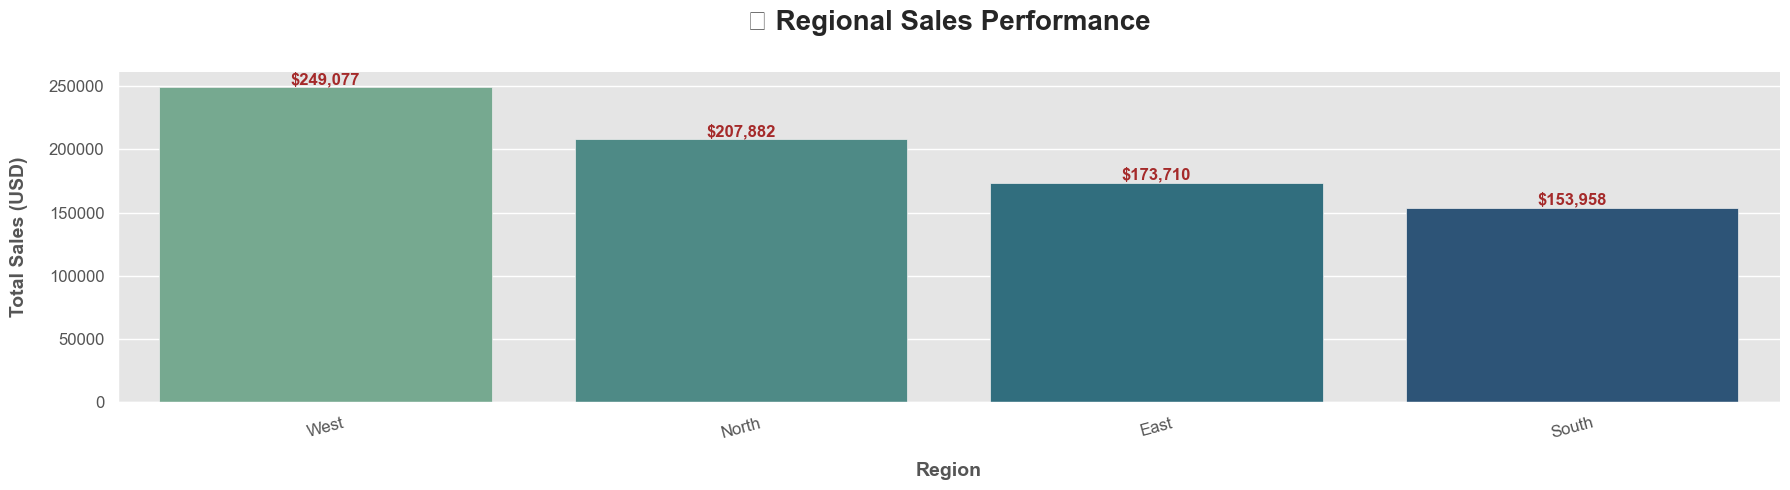

In [76]:


sns.set_theme(style="whitegrid")
style.use('ggplot')
plt.figure(figsize=(18, 5))

ax = sns.barplot(
    data=region_sales_df,
    x="region",
    y="total_sales",
    palette="crest"
)

ax.set_title(
    "🌍 Regional Sales Performance",
    fontsize=20,
    weight='bold',
    pad=30,
    loc='center'
)

ax.set_xlabel("Region", fontsize=14, labelpad=15, weight='semibold')
ax.set_ylabel("Total Sales (USD)", fontsize=14, labelpad=15, weight='semibold')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"${height:,.0f}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=12,
        weight='bold',
        color='brown'
    )

sns.despine(top=True, right=True)
ax.tick_params(labelsize=12)
plt.xticks(rotation=15)  
plt.tight_layout()
plt.show()

## Average Purchase Per Customer

In [78]:
query = text("""
    SELECT 
        fs.customer_id,
        COUNT(fs.sale_id) AS total_orders,
        ROUND(AVG(fs.total_price)::NUMERIC, 2) AS avg_purchase,
        ROUND(SUM(fs.total_price)::NUMERIC, 2) AS total_spent,
        dc.gender,
        dc.education
    FROM 
        fact_sales fs
    JOIN 
        dim_customer dc ON fs.customer_id = dc.customer_id
    GROUP BY 
        fs.customer_id, dc.gender, dc.education
    ORDER BY 
        total_spent DESC
    LIMIT 10;
""")

top_customers_df = pd.read_sql(query, con=engine)
top_customers_df.head()

,customer_id,total_orders,avg_purchase,total_spent,gender,education
0,CUST4990,1,14572.20,14572.20,Male,PhD
1,CUST8962,1,14214.90,14214.90,Male,Master's
2,CUST2876,1,11645.55,11645.55,Male,Master's
3,CUST6772,1,11228.50,11228.50,Male,PhD
4,CUST2622,1,11185.60,11185.60,Female,PhD


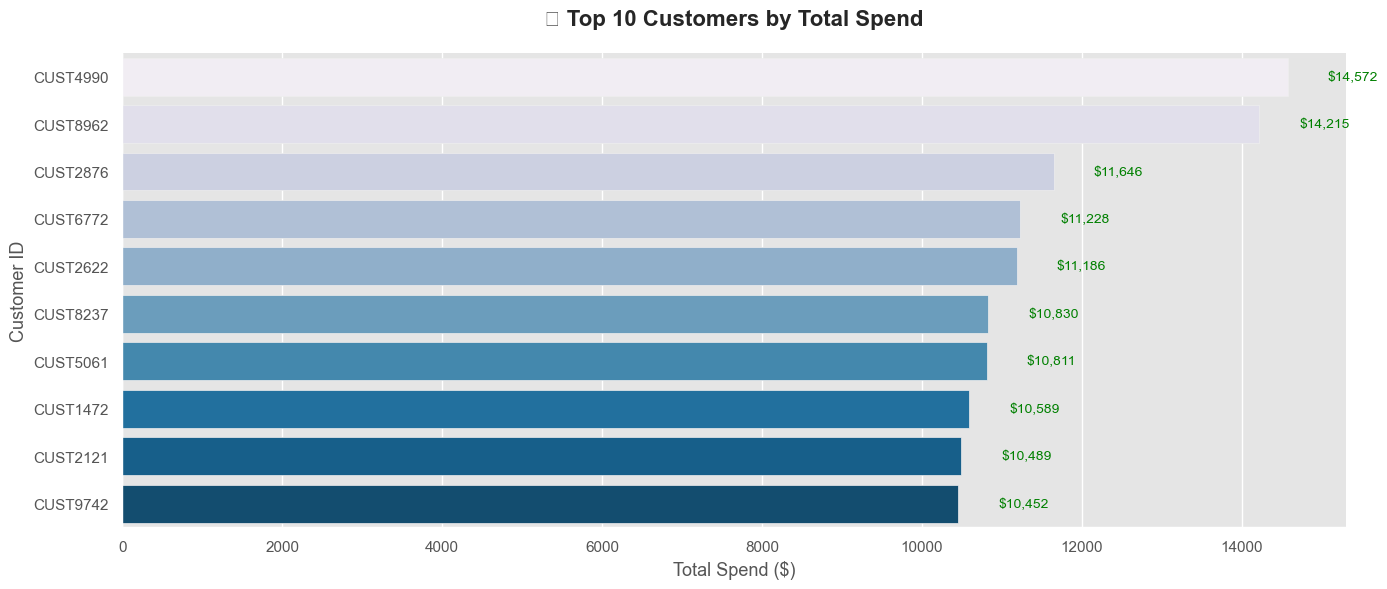

In [82]:
plt.figure(figsize=(14, 6))
style.use('ggplot')

ax = sns.barplot(
    data=top_customers_df,
    x="total_spent",
    y="customer_id",
    palette="PuBu"  
)

# Title and labels
ax.set_title("💰 Top 10 Customers by Total Spend", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Total Spend ($)", fontsize=13)
ax.set_ylabel("Customer ID", fontsize=13)

for p in ax.patches:
    ax.annotate(
        f"${p.get_width():,.0f}",
        (p.get_width() + 500, p.get_y() + p.get_height() / 2.),
        va='center',
        fontsize=10,
        color='green'
    )

sns.despine()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# 14. API DATA CORRELATION WITH SALES 
 API data correlation with sales (i.e region vs quantity sold). with an assumption that region affects weather 

In [84]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sale_id      200 non-null    int64         
 1   date         200 non-null    datetime64[ns]
 2   product      200 non-null    object        
 3   quantity     200 non-null    int64         
 4   unit_price   200 non-null    float64       
 5   total_price  200 non-null    float64       
 6   region       200 non-null    object        
 7   sales_rep    200 non-null    object        
 8   customer_id  200 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ KB


In [86]:
sales_df.head()

,sale_id,date,product,quantity,unit_price,total_price,region,sales_rep,customer_id
0,1,2024-11-23,Smartphone,1,1117.49,1117.49,South,Bob,CUST3286
1,2,2024-02-22,Smartphone,10,644.44,6444.40,North,Alice,CUST4582
2,3,2024-04-29,Laptop,9,314.28,2828.52,West,Bob,CUST8359
3,4,2024-10-28,Keyboard,1,1143.03,1143.03,South,Frank,CUST7924
4,5,2024-06-23,Keyboard,3,338.66,1015.98,East,Alice,CUST2519


In [88]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    30 non-null     int64              
 1   title                 30 non-null     object             
 2   description           30 non-null     object             
 3   category              30 non-null     object             
 4   price                 30 non-null     float64            
 5   discountpercentage    30 non-null     float64            
 6   rating                30 non-null     float64            
 7   stock                 30 non-null     int64              
 8   tags                  30 non-null     object             
 9   brand                 15 non-null     object             
 10  sku                   30 non-null     object             
 11  weight                30 non-null     int64              
 12  warrantyin

In [90]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  170 non-null    object        
 1   age          170 non-null    int64         
 2   location     170 non-null    object        
 3   salary       170 non-null    int64         
 4   race         170 non-null    object        
 5   gender       170 non-null    object        
 6   education    170 non-null    object        
 7   sale_id      170 non-null    int64         
 8   date         170 non-null    datetime64[ns]
 9   product      170 non-null    object        
 10  quantity     170 non-null    int64         
 11  unit_price   170 non-null    float64       
 12  total_price  170 non-null    float64       
 13  region       170 non-null    object        
 14  sales_rep    170 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
mem

In [92]:
products_df.head()

,id,title,description,category,price,discountpercentage,rating,stock,tags,brand,sku,weight,warrantyinformation,shippinginformation,availabilitystatus,reviews,returnpolicy,minimumorderquantity,images,thumbnail,dimensions.width,dimensions.height,dimensions.depth,meta.createdat,meta.updatedat,meta.barcode,meta.qrcode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,"[beauty, mascara]",Essence,BEA-ESS-ESS-001,4,1 week warranty,Ships in 3-5 business days,In Stock,"[{'rating': 3, 'comment': 'Would not recommend...",No return policy,48,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,15.14,13.08,22.99,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,5784719087687,https://cdn.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,"[beauty, eyeshadow]",Glamour Beauty,BEA-GLA-EYE-002,9,1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",7 days return policy,20,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,9.26,22.47,27.67,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,9170275171413,https://cdn.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,"[beauty, face powder]",Velvet Touch,BEA-VEL-POW-003,8,3 months warranty,Ships in 1-2 business days,In Stock,"[{'rating': 4, 'comment': 'Would buy again!', ...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,29.27,27.93,20.59,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,8418883906837,https://cdn.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,"[beauty, lipstick]",Chic Cosmetics,BEA-CHI-LIP-004,1,3 year warranty,Ships in 1 week,In Stock,"[{'rating': 4, 'comment': 'Great product!', 'd...",7 days return policy,40,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,18.11,28.38,22.17,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,9467746727219,https://cdn.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,"[beauty, nail polish]",Nail Couture,BEA-NAI-NAI-005,8,1 month warranty,Ships overnight,In Stock,"[{'rating': 2, 'comment': 'Poor quality!', 'da...",No return policy,22,[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...,21.63,16.48,29.84,2025-04-30 09:41:02.053000+00:00,2025-04-30 09:41:02.053000+00:00,4063010628104,https://cdn.dummyjson.com/public/qr-code.png


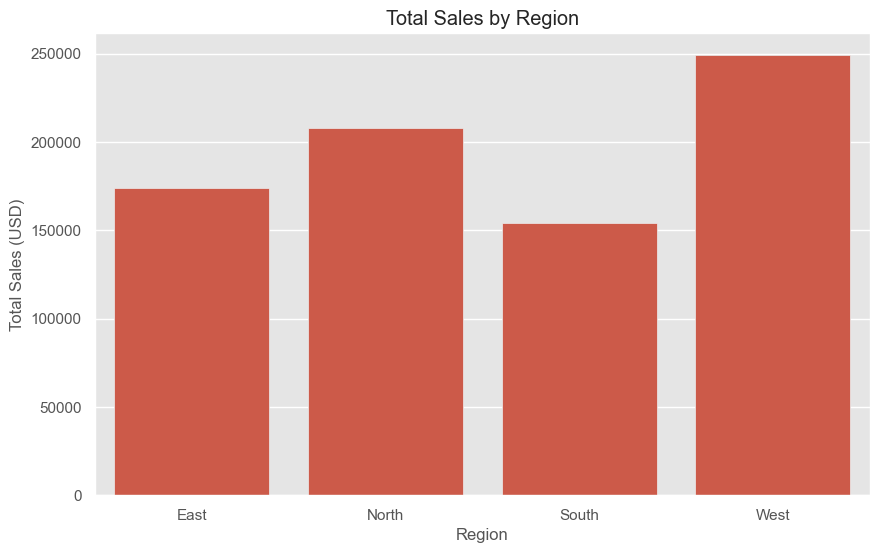

In [94]:
region_sales = sales_df.groupby('region')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='region', y='total_price')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

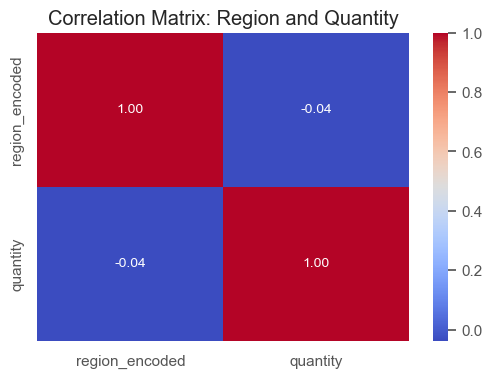

In [96]:
region_mapping = {
    'West': 1,
    'North': 2,
    'East': 3,
    'South': 4
}
sales_df['region_encoded'] = sales_df['region'].map(region_mapping)

correlation_data = sales_df[['region_encoded', 'quantity']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Region and Quantity')
plt.show()


In [98]:
correlation_matrix

,region_encoded,quantity
region_encoded,1.000000,-0.037084
quantity,-0.037084,1.000000
